In [1]:
#import libraries
import numpy as np 
import pandas as pd
import seaborn as sns  
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('StudentsPerformance.csv')
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


- _.head()_ function (included in pandas library) returns first five observations of the dataset.

In [3]:
df.shape

(1000, 8)

- Dataset comprises 1000 observations and 8 features

In [4]:
df.dtypes

gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object

- Data has _integer_ and _object_ datatypes 

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
gender                         1000 non-null object
race/ethnicity                 1000 non-null object
parental level of education    1000 non-null object
lunch                          1000 non-null object
test preparation course        1000 non-null object
math score                     1000 non-null int64
reading score                  1000 non-null int64
writing score                  1000 non-null int64
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


- No variable has _null_ values

- The 3 different scores are discrete in nature (integer datatype) and the other 5 variables are categorical in nature (object datatype)

In [6]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


- _describe()_ function (included in pandas library) is a very useful function in getting various summary statistics

- For the given dataset, the mean of every score is almost near to the median value

- But there is a significant difference between the 75%ile value and the maximum value in each of the columns

- The above observation concludes that there are some extreme values (outliers) in all the 3 different scores 

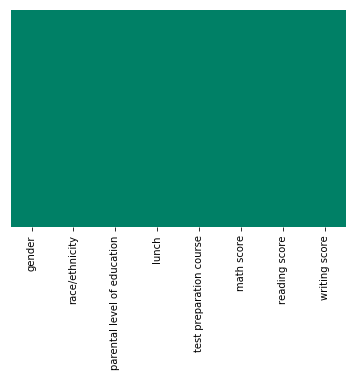

In [7]:
sns.heatmap(df.isnull(),cbar=False,yticklabels=False,cmap = 'summer')

- Dataset has no missing values

- If there were any, there would have been patches of other shade on this green background

In [8]:
dummy_features=pd.get_dummies(df,columns=['gender','race/ethnicity','parental level of education','lunch','test preparation course'])

- We applied a specific encoding scheme to the categorical values because we would like to see the dependence of the different scores on these categorical variables

In [9]:
df_new=pd.concat([dummy_features.iloc[:,3:],df[['math score','reading score','writing score']]],axis=1)
df_new.head()

,gender_female,gender_male,race/ethnicity_group A,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,parental level of education_associate's degree,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school,lunch_free/reduced,lunch_standard,test preparation course_completed,test preparation course_none,math score,reading score,writing score
0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,72,72,74
1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,69,90,88
2,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,90,95,93
3,0,1,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,47,57,44
4,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,76,78,75


- We created a new dataframe consisting of the dummies produced in the above step

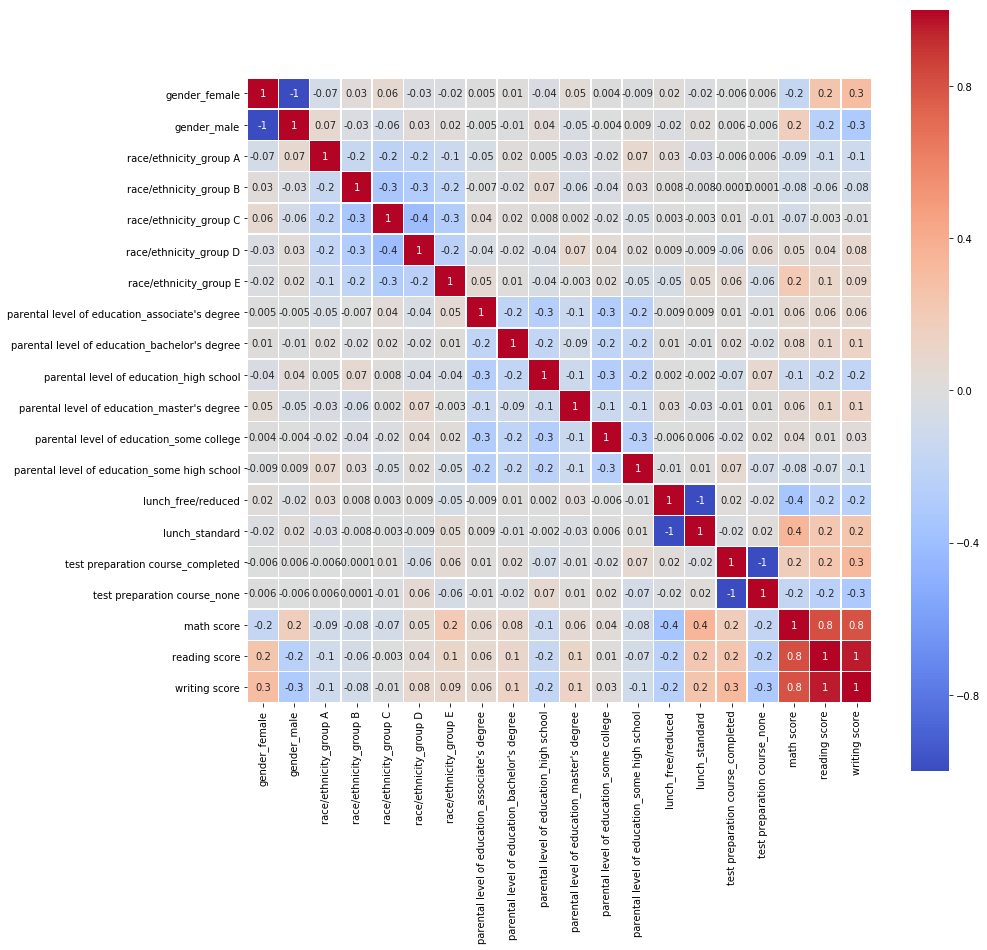

In [10]:
plt.figure(figsize=(14,14))
sns.heatmap(df_new.corr(), annot=True,fmt='.1g',vmin=-1, vmax=1, center= 0,cmap= 'coolwarm',square=True,linewidths=.5)

- From this correlation matrix, we can conclude that none of the _feature variables_ have any significant correlation between them

- We could also see that there is pretty much corelation between the different scores _(dependent variables)_.

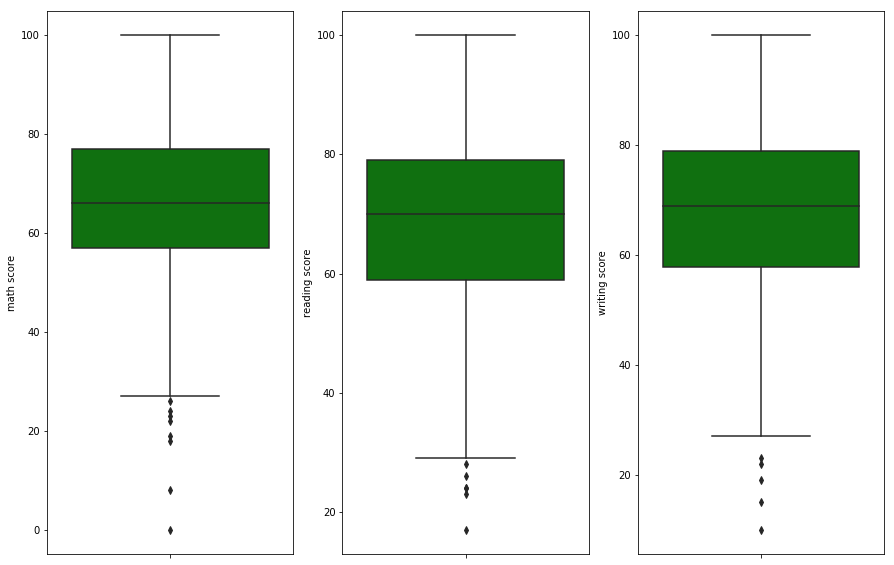

In [11]:
plt.figure(figsize=(15,10))

plt.subplot(1,3,1)
sns.boxplot(y="math score", data=df,color='green')

plt.subplot(1,3,2)
sns.boxplot(y="reading score", data=df,color='green')

plt.subplot(1,3,3)
sns.boxplot(y="writing score", data=df,color='green')

- From these boxplots we can conclude that there are some __outliers__ in all the three different scores, in the lower strata

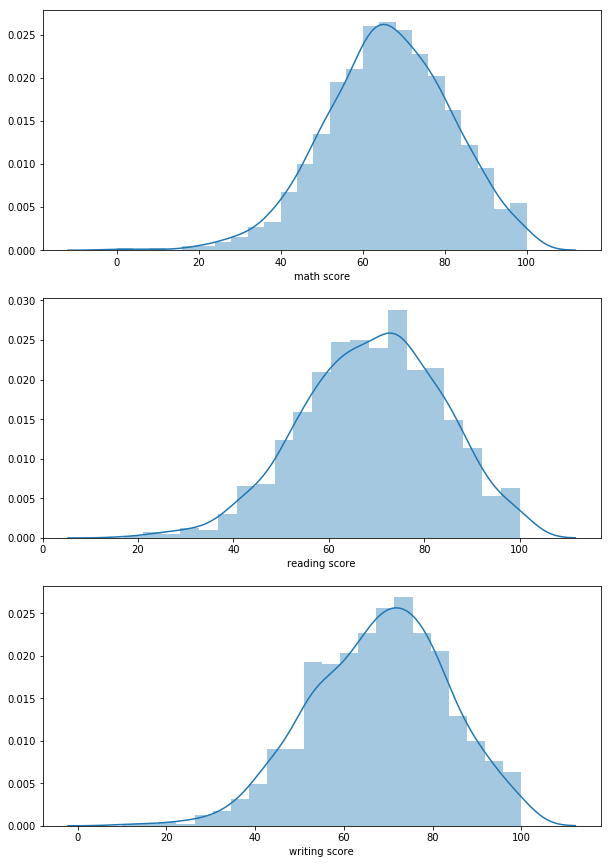

In [12]:
plt.figure(figsize=(10,15))

plt.subplot(3,1,1)
sns.distplot(df["math score"],kde=True)

plt.subplot(3,1,2)
sns.distplot(df["reading score"],kde=True)

plt.subplot(3,1,3)
sns.distplot(df["writing score"],kde=True)

- 

- math score seems to be _normally_ distributed whereas reading and writing score appear to be a little __negatively skewed__.

- In all the three scores, most of the students scored around _60-70_ marks

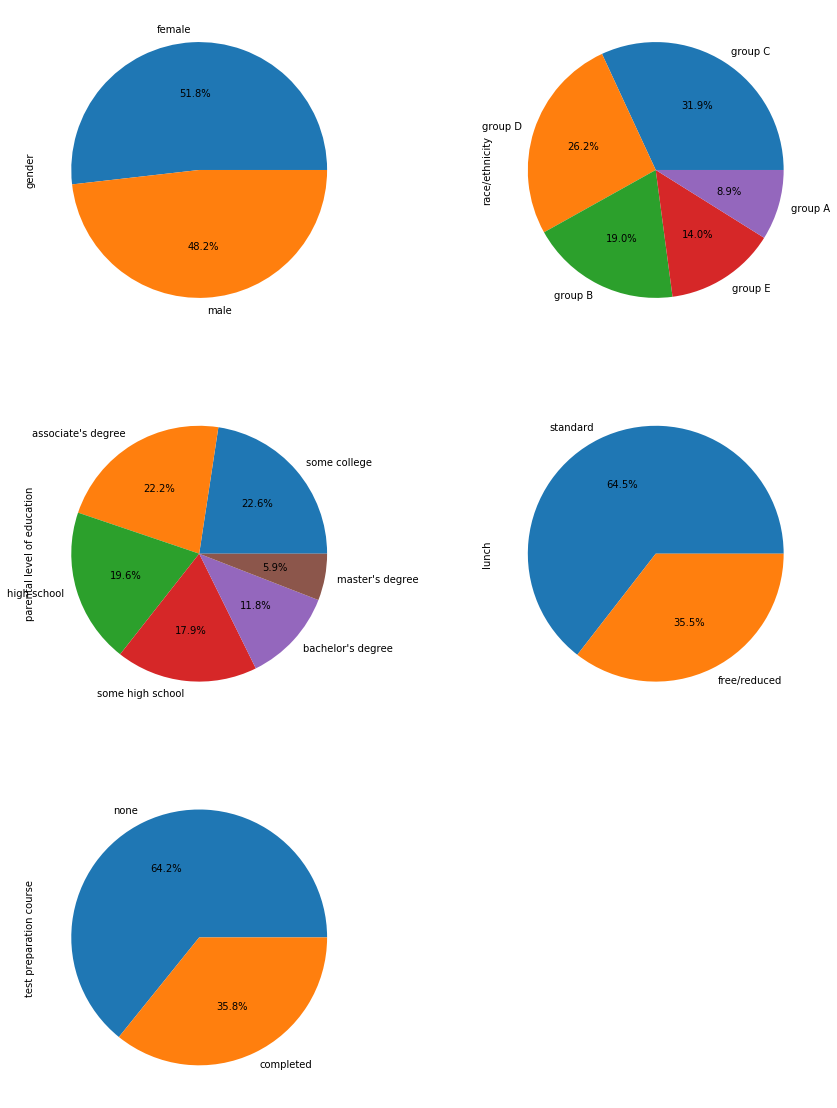

In [13]:
plt.figure(figsize=(15,20))
plt.subplot(3,2,1)
df.iloc[:,0].value_counts().plot.pie(autopct='%1.1f%%')
plt.subplot(3,2,2)
df.iloc[:,1].value_counts().plot.pie(autopct='%1.1f%%')
plt.subplot(3,2,3)
df.iloc[:,2].value_counts().plot.pie(autopct='%1.1f%%')
plt.subplot(3,2,4)
df.iloc[:,3].value_counts().plot.pie(autopct='%1.1f%%')
plt.subplot(3,2,5)
df.iloc[:,4].value_counts().plot.pie(autopct='%1.1f%%')

- Female to Male ratio is almost __1__

- _Group C_ has the maximum chunk of students and _Group A_ has the minimum chunk

- Majority of the parents have __associate's degree__ and __some college, high school__ education

- More than half of the students have _standard lunch (64.5%)_

- More than half of the students __didn't__ complete their _test preparation course_

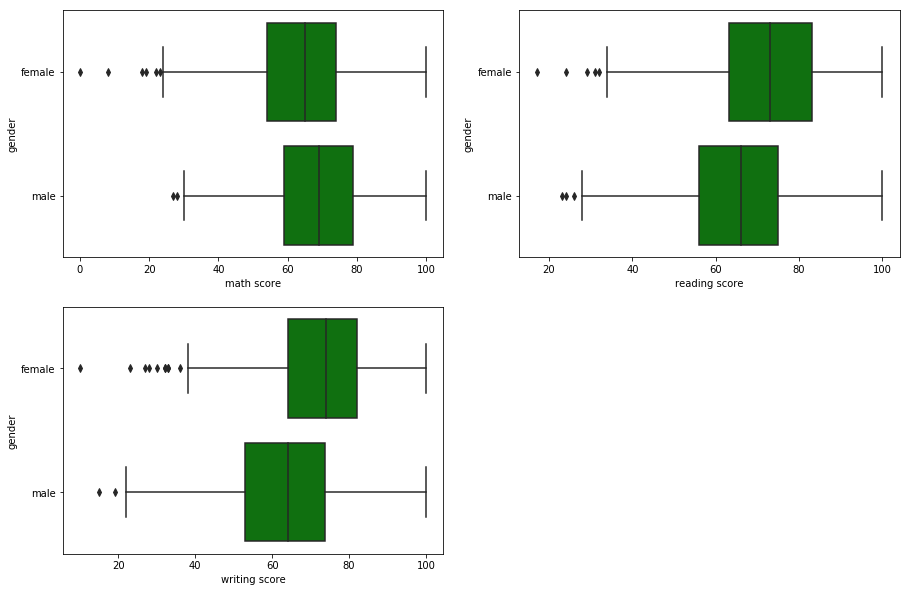

In [14]:
plt.figure(figsize=(15,10))

plt.subplot(2,2,1)
sns.boxplot(x="math score",y="gender", data=df,color='green')

plt.subplot(2,2,2)
sns.boxplot(x="reading score",y="gender", data=df,color='green')

plt.subplot(2,2,3)
sns.boxplot(x="writing score",y="gender", data=df,color='green')

- >In all the 3 scores, girls have grabbed the minimum mark
- > There are a couple of boys and girls who have secured extremely poor marks in all the three.

### math score
- Boys outperformed girls.

### reading score
- Girls outperformed boys.

### writing score
- Girls outperformed boys.

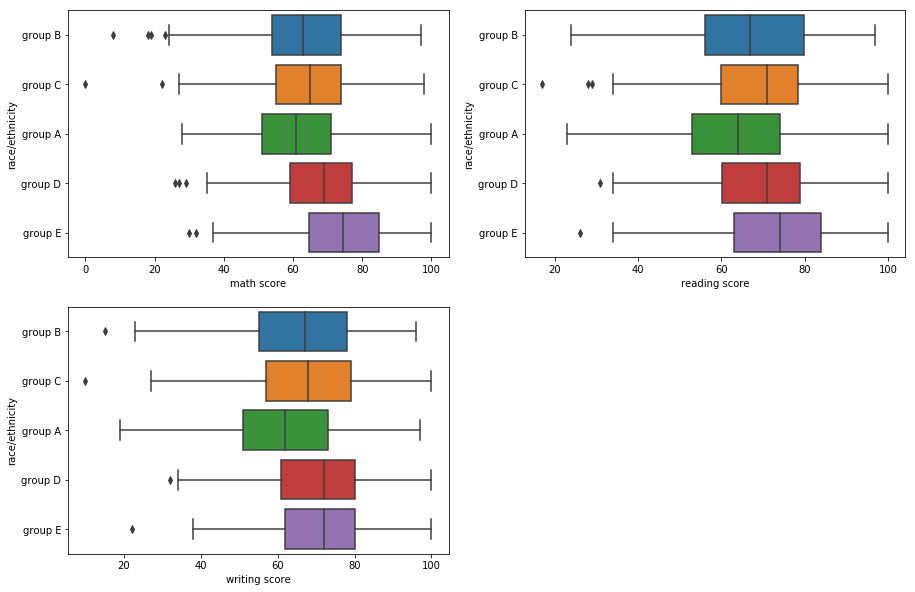

In [15]:
plt.figure(figsize=(15,10))

plt.subplot(2,2,1)
sns.boxplot(x="math score",y="race/ethnicity", data=df)

plt.subplot(2,2,2)
sns.boxplot(x="reading score",y="race/ethnicity", data=df)

plt.subplot(2,2,3)
sns.boxplot(x="writing score",y="race/ethnicity", data=df)

### math score
- > Students belonging to group A performed a little poor than the others. Group E students performed well.

### reading score
- > Students belonging to group A performed poor than the others. Group E students did well.

### writing score
- > Students from all groups performed almost similar. Group A students had a little lag.

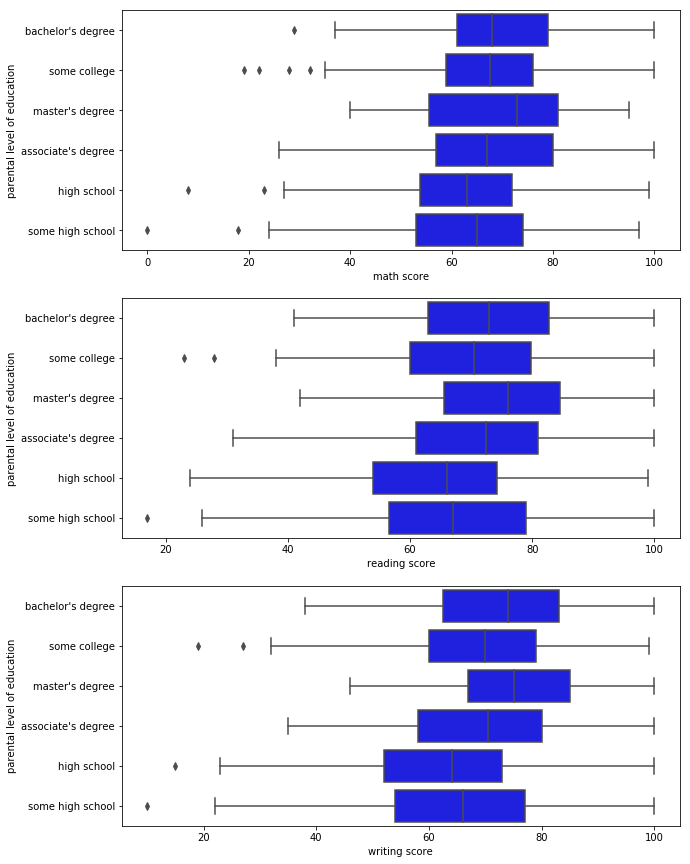

In [16]:
plt.figure(figsize=(10,15))

plt.subplot(3,1,1)
sns.boxplot(x="math score",y="parental level of education", data=df,color='blue')

plt.subplot(3,1,2)
sns.boxplot(x="reading score",y="parental level of education", data=df,color='blue')

plt.subplot(3,1,3)
sns.boxplot(x="writing score",y="parental level of education", data=df,color='blue')

### math score
- > Students whose parents had _Bachelor's Degree, Master's Degree_ and _Assosciate's Degree_ performed better than others
- > Students whose parents had education- _some college_ performed better than the students whose parents had education- _high school_ and _some high school_

### reading score
- > Students whose parents had _Bachelor's Degree_, and _Master's Degree_ performed better than others
- > Students whose parents had _some college, Assosciate's Degree_ and _some high school_ performed better than students whose parents had education- _high school_

### writing score
- > Students whose parents had _Bachelor's Degree,_ and _Master's Degree_ performed better than others
- > Students whose parents had _Assosciate's Degree, some college_ and _some high school_ performed better than students whose parents had education- _high school_

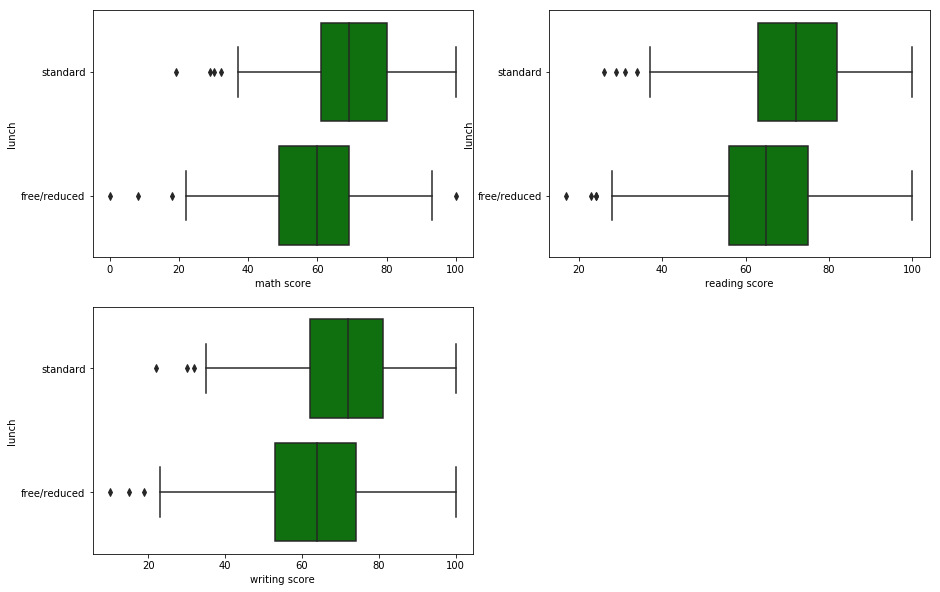

In [17]:
plt.figure(figsize=(15,10))

plt.subplot(2,2,1)
sns.boxplot(x="math score",y="lunch", data=df,color='green')

plt.subplot(2,2,2)
sns.boxplot(x="reading score",y="lunch", data=df,color='green')

plt.subplot(2,2,3)
sns.boxplot(x="writing score",y="lunch", data=df,color='green')

- Students who had _standard lunch_ performed better than those who had _free/reduced lunch_

- There are still a few who peformed poor in both the categories

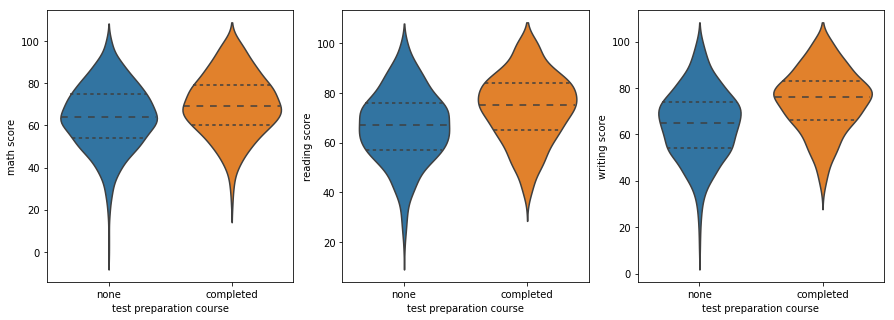

In [18]:
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
sns.violinplot(x=df.iloc[:,4], y='math score', data=df,split=True, inner="quart")

plt.subplot(1,3,2)
sns.violinplot(x=df.iloc[:,4], y='reading score', data=df,split=True, inner="quart")

plt.subplot(1,3,3)
sns.violinplot(x=df.iloc[:,4], y='writing score', data=df,split=True, inner="quart")

- Students who completed Test Preparartion course had the _minimum mark_ greater than those who didn't complete the test preparation course

- Regardless of the status of completion of the course, _most_ of the students scored marks in the same range __(60-80)__

## Conclusion
- > Girls scored good in _reading_ and _writing scores_ whereas boys scored good in _math score_

- > Students from __Group E__ perfomed well in all the three whereas __Group A__ students had a little lag.

- > Students whose parents had _Master's Degree_ and _Bachelor's Degree_ performed better, followed by students whose parents had _Assosciate's Degree_ and then followed by students whose parents had _high school_ education

- > But we can infer that _parental level of education_ had a little less effect on _math scores_ than others

- > Students who had _standard lunch_ performed better

- > Students who completed the Test Preparation Course had the highest minimum mark. 

- > Test Preparation Course seems to have helped students lift their minimum mark up. 

- > Most of the students regardless of the Test Preparation Course scored in the range of 60-80 in all the three.